In [423]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [424]:
aapl = pd.read_csv('./All_Data/5ydata/AAPL.csv',delimiter = ',')
aapl_daily_ret = aapl['Adj Close'].pct_change()
aapl_log = np.log(1+ aapl_daily_ret)

/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anshul/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


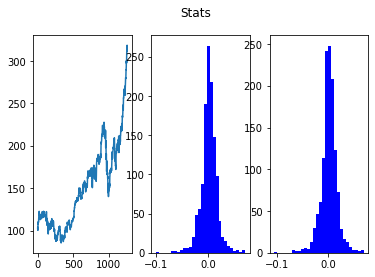

In [425]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Stats')
ax1.plot(aapl['Adj Close'])
ax2.hist(aapl_daily_ret.values,bins = 30,color = 'b')
ax3.hist(aapl_log.values,bins = 30,color = 'b')
plt.show()


In [426]:
'''
MONTE CARLO SIMULATION

'''
from scipy.stats import norm

def Monte_Carlo(log_returns,sim_length,sim_iterations):
    
    u = log_returns.mean()

    var = log_returns.var()

    drift = u - (0.5 * var)

    # Calculating the standard deviation of log returns

    stdev = log_returns.std()
    stdev = np.array(stdev)
    drift = np.array(drift)

    t_intervals = sim_length
    iterations = sim_iterations

    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

    S0 = 1

    price_list = np.zeros_like(daily_returns)

    # Replace the first row with the first price
    price_list[0] = S0


    for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns[t]
    
    return price_list,daily_returns

In [427]:
MCS,daily_returns = Monte_Carlo(aapl_log,72,1000)

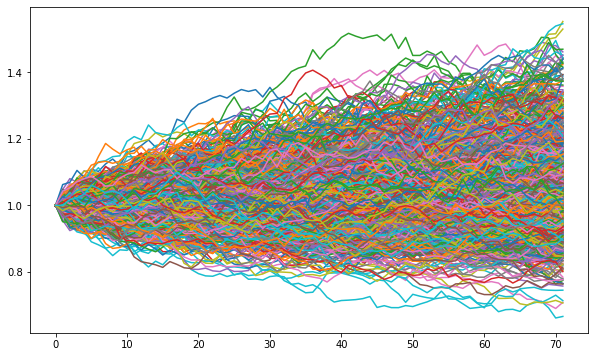

In [428]:
plt.figure(figsize=(10,6))
plt.plot(MCS)
#plt.plot(testing.values,linewidth =4)
plt.show()

In [429]:
def print_MCS_Stats(MCS,sim_length):
    print("The mean ending value of the simulations :",np.mean(MCS[-1]))
    print("The median ending value of the simulations :",np.median(MCS[-1]))
    print("The standard deviation of ending value of the simulations :",np.std(MCS[-1]))
    #print("The variance of the ending value of simulations :",np.var(price_list[-1]))
    print("The confidence of 95% the fluctations deviate in +/-: ", 1.96*np.std(MCS[-1]))
    print("The 95% percentile : ", np.percentile(MCS[-1], 95))
    print("The 90% percentile : ", np.percentile(MCS[-1], 90))
    print("The 75% percentile : ", np.percentile(MCS[-1], 75))
    print("The 50% percentile : ", np.percentile(MCS[-1], 50))
    print("The 35% percentile : ", np.percentile(MCS[-1], 35))
    print("The 20% percentile : ", np.percentile(MCS[-1], 20))
    print("The 10% percentile : ", np.percentile(MCS[-1], 10))
    print("The 5% percentile : ", np.percentile(MCS[-1], 5))
    print("The 2% percentile : ", np.percentile(MCS[-1], 2))
    print("The 1% percentile : ", np.percentile(MCS[-1], 1))
    
    percentiles = []
    
    for i in range(1,100):
        percentiles.append(np.percentile(MCS[-1],i))
    
    positives = []
    
    for i in range(len(percentiles)):
        percentiles[i] = (percentiles[i] - 1)*100
        if percentiles[i] >0:
            positives.append(True)
        else:
            positives.append(False)
            
    positives = pd.Series(positives)
    
    fig = plt.figure(figsize=(10,4))    
    plt.bar(np.arange(1,len(percentiles)+1),percentiles,color=positives.map({True: 'g', False: 'r'}),width = 0.5)
    plt.axhline(0,color='black')
    plt.ylabel('Percentage Returns across Quarters')
    plt.xlabel('Quarters')
    plt.title('Percentile Return')
    plt.show()

The mean ending value of the simulations : 1.0685672364943166
The median ending value of the simulations : 1.0602372656082486
The standard deviation of ending value of the simulations : 0.14038684248806813
The confidence of 95% the fluctations deviate in +/-:  0.2751582112766135
The 95% percentile :  1.3196735192344713
The 90% percentile :  1.2594013843471512
The 75% percentile :  1.1512700227600914
The 50% percentile :  1.0602372656082486
The 35% percentile :  1.0085904057739457
The 20% percentile :  0.9506558097925917
The 10% percentile :  0.8989670978068501
The 5% percentile :  0.8543710348476237
The 2% percentile :  0.8137854349997535
The 1% percentile :  0.7759597508916221


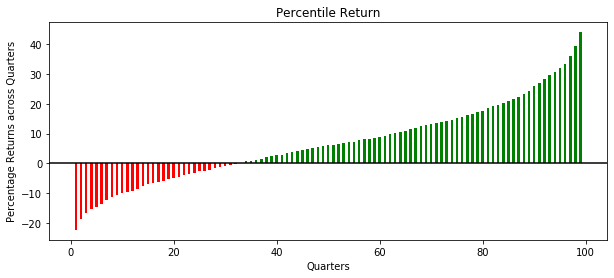

In [430]:
print_MCS_Stats(MCS,100)

In [431]:
daily_returns[:,0]

array([1.030317  , 1.03216288, 1.00682316, 1.01798117, 1.00051154,
       0.99307172, 0.98518656, 0.99496631, 1.00038544, 0.98682755,
       1.01397746, 1.02641905, 0.99359679, 1.01310892, 0.99811081,
       0.99312811, 0.99385292, 0.9805142 , 1.02155419, 1.00740179,
       1.00292083, 1.03469248, 1.00127357, 1.01328018, 0.96508028,
       1.01137025, 0.98543856, 0.98160782, 1.00723573, 1.00826341,
       1.03507379, 1.01015271, 1.00355545, 0.99014534, 1.00204185,
       0.98281215, 1.01423425, 0.98485643, 0.98240316, 1.02657981,
       1.01217208, 1.00190437, 1.01770136, 1.0004612 , 1.01709567,
       1.02913992, 1.00527137, 0.9846016 , 0.99702024, 1.01506925,
       1.01404933, 1.00094535, 0.99190167, 1.00314958, 1.0047264 ,
       0.97694139, 0.9972007 , 1.00638685, 1.00352213, 1.00553448,
       1.02549901, 0.98347978, 1.0092588 , 1.01791891, 0.99237394,
       1.02338072, 0.9960672 , 0.99209897, 0.97109706, 0.99203641,
       1.00109809, 1.00059122])

# Getting Portfolio

In [473]:
preds = pd.read_csv('./All_Data/Labels_and_Preds/standard_Predictions_Lasso.csv',delimiter = ',')
labels = pd.read_csv('./All_Data/Labels_and_Preds/Labels.csv',delimiter = ',')
preds = preds.set_index('Unnamed: 0')
labels = labels.set_index('Unnamed: 0')
preds

,0,1,2,3,4,5,6,7
Unnamed: 0,,,,,,,,
A_quarterly_financial_data.csv,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344
AMR_quarterly_financial_data.csv,-0.007879,-0.005134,-0.009877,-0.005791,0.003589,-0.020144,-0.017351,-0.015566
AAN_quarterly_financial_data.csv,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018
AAPL_quarterly_financial_data.csv,0.071074,0.063724,0.072698,0.049899,0.053062,0.066312,0.064977,0.036756
ABT_quarterly_financial_data.csv,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958
ADBE_quarterly_financial_data.csv,0.049034,0.048838,0.048952,0.048949,0.049075,0.048856,0.048562,0.048591
ADI_quarterly_financial_data.csv,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037
ADM_quarterly_financial_data.csv,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471
ADSK_quarterly_financial_data.csv,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797


In [474]:
def get_index_names(df):
    names = []

    for i in range(len(df.index.values)):
        name = str(df.index.values[i])
        name = name.split('_')
        names.append(str(name[0]))
        
    return names

In [475]:
def give_quarter_performance(Predictions,Labels,quarter):
    '''
    
    Arguments:
    
    Predictions - A dataframe containing the predictions of each stock for the upcoming quarters (8)
    Labels - A dataframe containing the labels of each stock for the upcoming 8 quarters
    quarter - the required quarter to calculate performance
    
    
    Returns:
    
    A dataframe containing the predictions and labels for the top 30 stocks in that quarter
    
    '''
    quarter = str(quarter)
    Q = Predictions[quarter]
    Q_labels = Labels[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[index]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    quarter_portfolio = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return quarter_portfolio

In [476]:
q1_p = give_quarter_performance(preds,labels,1)
q1_names = get_index_names(q1_p)

In [477]:
def give_data_upto_quarter(quarter,stock):
    dates = ['2017-06-30','2017-09-30','2017-12-31','2018-03-31',
             '2018-06-30','2018-09-30','2018-12-31','2019-03-31']
    
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock.set_index('Date')
    return stock[:dates[quarter]]

In [478]:
def MCS_Quarter(quarter_names,quarter,sim_length,num_simulations):
    MCS_Quarter = {}
    for name in quarter_names:
        s=1
        try:
            stock = pd.read_csv('./All_Data/5ydata/'+name+'.csv',delimiter = ',')
            stock = give_data_upto_quarter(quarter,stock)
            stock_log = np.log(1 + stock['Adj Close'].pct_change())
            MCS,Daily = Monte_Carlo(stock_log,sim_length,num_simulations)
            MCS_Quarter[name] = MCS
        except:
            s=2
    
    return MCS_Quarter

In [479]:
def MCS_Returns_Quarter(MCS_Quarter,num_simulations,sim_length):
    keys = MCS_Quarter.keys()
    all_sims = []
    for i in range(num_simulations):
        one_sim = np.zeros(sim_length)
        for key in keys:
            stock = MCS_Quarter[key]
            one_sim += stock[:,i]
        
        one_sim = one_sim/one_sim[0]
        all_sims.append(one_sim)
    
    return all_sims

In [480]:
MCS_Daily = MCS_Quarter(q1_names,0,63,100)

In [481]:
MCS_Returns_Q = MCS_Returns_Quarter(MCS_Daily,100,63)

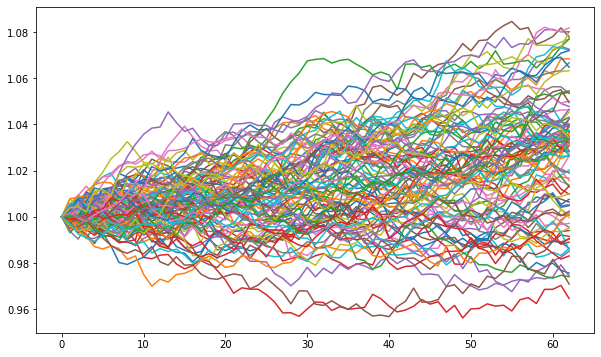

In [482]:
plt.figure(figsize=(10,6))
plt.plot(np.array(MCS_Returns_Q).T)
#plt.plot(testing.values,linewidth =4)
plt.show()

# Quarter Wise MCS

In [483]:
def MCS_Portfolio_One_Quarter(preds,labels,quarter,sim_length,num_simulations):
    quarter_portfolio = give_quarter_performance(preds,labels,quarter)
    quarter_names = get_index_names(quarter_portfolio)
    
    MCS_Daily = MCS_Quarter(q1_names,quarter,sim_length,num_simulations)
    MCS_Returns_Q = MCS_Returns_Quarter(MCS_Daily,num_simulations,sim_length)
    
    MCS = np.array(MCS_Returns_Q).T
    
    #plt.figure(figsize=(10,6))
    #plt.plot(MCS)
    #plt.plot(testing.values,linewidth =4)
    #plt.show()
    
    print_MCS_Stats(MCS,sim_length)
    
    return MCS[-1]
    

The mean ending value of the simulations : 1.0298832393603217
The median ending value of the simulations : 1.0295749970219563
The standard deviation of ending value of the simulations : 0.027180681128741557
The confidence of 95% the fluctations deviate in +/-:  0.053274135012333454
The 95% percentile :  1.0770108419376119
The 90% percentile :  1.0667138532391982
The 75% percentile :  1.04831551079481
The 50% percentile :  1.0295749970219563
The 35% percentile :  1.0175287110451159
The 20% percentile :  1.0064250864826092
The 10% percentile :  0.9946195238302487
The 5% percentile :  0.9872181823661745
The 2% percentile :  0.976912971782515
The 1% percentile :  0.9715407895312342


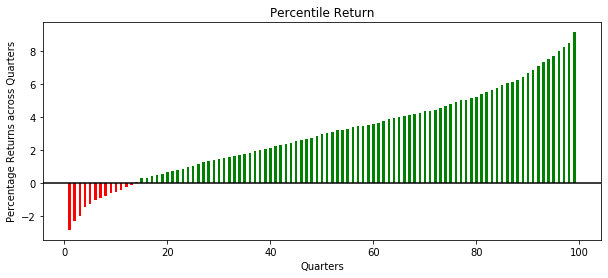

In [484]:
MCS_Result = MCS_Portfolio_One_Quarter(preds,labels,0,63,500)

# Generate MCS for all 8 quarters 

The mean ending value of the simulations : 1.0304725358572528
The median ending value of the simulations : 1.0292449826802987
The standard deviation of ending value of the simulations : 0.025627694821584942
The confidence of 95% the fluctations deviate in +/-:  0.05023028185030649
The 95% percentile :  1.071814186539429
The 90% percentile :  1.0644146315927288
The 75% percentile :  1.048506004675491
The 50% percentile :  1.0292449826802987
The 35% percentile :  1.0208645773490022
The 20% percentile :  1.008016475839508
The 10% percentile :  0.9982658038603087
The 5% percentile :  0.9894511496103184
The 2% percentile :  0.9786590494278106
The 1% percentile :  0.9745333184438515


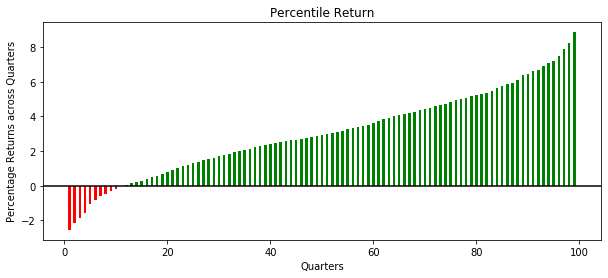

The mean ending value of the simulations : 1.031650384605254
The median ending value of the simulations : 1.0305749556846644
The standard deviation of ending value of the simulations : 0.026727294542010744
The confidence of 95% the fluctations deviate in +/-:  0.05238549730234106
The 95% percentile :  1.0763883257976457
The 90% percentile :  1.0668010196459041
The 75% percentile :  1.0489740343000005
The 50% percentile :  1.0305749556846644
The 35% percentile :  1.0208294891560519
The 20% percentile :  1.0089551155325884
The 10% percentile :  0.9977515362047995
The 5% percentile :  0.9896956551139185
The 2% percentile :  0.9788489826859801
The 1% percentile :  0.9709051117383443


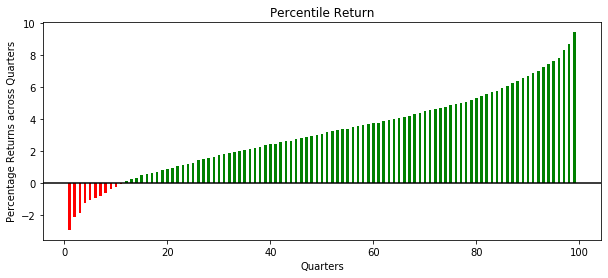

The mean ending value of the simulations : 1.0355101568737644
The median ending value of the simulations : 1.0354197382977834
The standard deviation of ending value of the simulations : 0.026425652736667755
The confidence of 95% the fluctations deviate in +/-:  0.0517942793638688
The 95% percentile :  1.0790774741621123
The 90% percentile :  1.069661505122562
The 75% percentile :  1.052584440869797
The 50% percentile :  1.0354197382977834
The 35% percentile :  1.025807341798925
The 20% percentile :  1.0138978115479955
The 10% percentile :  1.0004794615545567
The 5% percentile :  0.9913259524323459
The 2% percentile :  0.9818463473990104
The 1% percentile :  0.9761953381126482


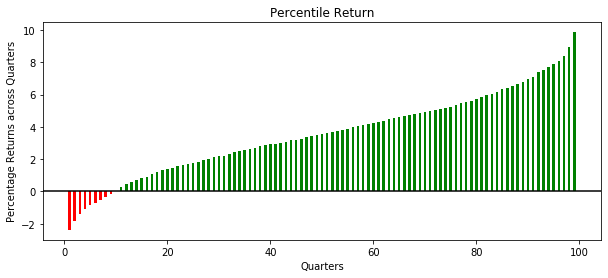

The mean ending value of the simulations : 1.0345571369179856
The median ending value of the simulations : 1.033425158948909
The standard deviation of ending value of the simulations : 0.026958871495907765
The confidence of 95% the fluctations deviate in +/-:  0.05283938813197922
The 95% percentile :  1.0801280049205937
The 90% percentile :  1.0701745692573228
The 75% percentile :  1.0526936104309794
The 50% percentile :  1.033425158948909
The 35% percentile :  1.023861206219817
The 20% percentile :  1.011789329685509
The 10% percentile :  0.9999358908180304
The 5% percentile :  0.9907833468232552
The 2% percentile :  0.9801453939520118
The 1% percentile :  0.9745555595732249


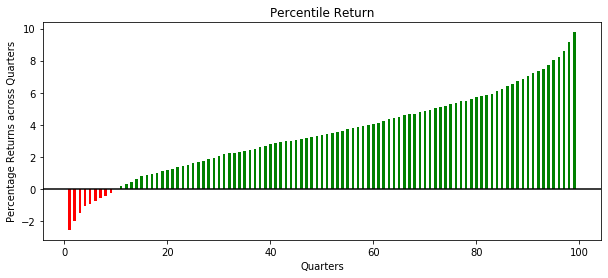

The mean ending value of the simulations : 1.0350259909145205
The median ending value of the simulations : 1.0343269548472878
The standard deviation of ending value of the simulations : 0.025970751953455985
The confidence of 95% the fluctations deviate in +/-:  0.050902673828773726
The 95% percentile :  1.0786460684846315
The 90% percentile :  1.067750952825168
The 75% percentile :  1.0526794297989843
The 50% percentile :  1.0343269548472878
The 35% percentile :  1.0245172692798312
The 20% percentile :  1.0138609015834201
The 10% percentile :  1.0029785777550964
The 5% percentile :  0.9942247878467926
The 2% percentile :  0.9806494005243971
The 1% percentile :  0.9738547297978718


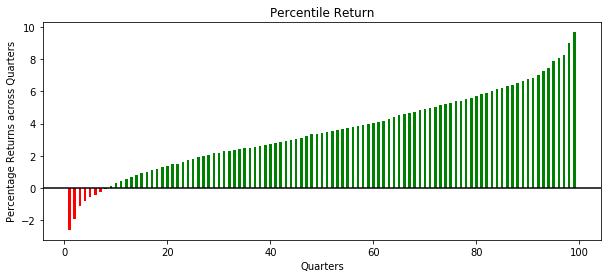

The mean ending value of the simulations : 1.0381939931135353
The median ending value of the simulations : 1.037969294255114
The standard deviation of ending value of the simulations : 0.02548093164694577
The confidence of 95% the fluctations deviate in +/-:  0.049942626028013706
The 95% percentile :  1.0791388138060372
The 90% percentile :  1.0708021360529658
The 75% percentile :  1.0551563230862009
The 50% percentile :  1.037969294255114
The 35% percentile :  1.0284485417287164
The 20% percentile :  1.0160792574708302
The 10% percentile :  1.004805014427761
The 5% percentile :  0.9973415304481553
The 2% percentile :  0.9876930147829851
The 1% percentile :  0.9811275475800264


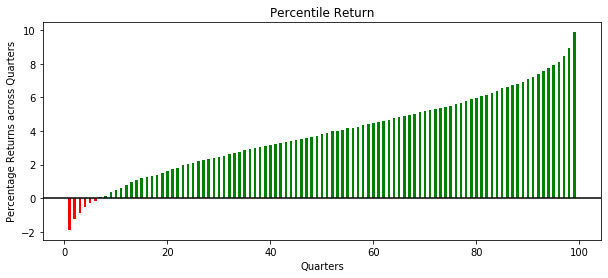

The mean ending value of the simulations : 1.0253241112082792
The median ending value of the simulations : 1.0243455968881578
The standard deviation of ending value of the simulations : 0.025972466260549953
The confidence of 95% the fluctations deviate in +/-:  0.05090603387067791
The 95% percentile :  1.0683394764466987
The 90% percentile :  1.058217134399294
The 75% percentile :  1.0433035293286024
The 50% percentile :  1.0243455968881578
The 35% percentile :  1.0140834916593326
The 20% percentile :  1.0038000461854846
The 10% percentile :  0.9919033502170597
The 5% percentile :  0.9848173487991356
The 2% percentile :  0.972278518350973
The 1% percentile :  0.9649824916078079


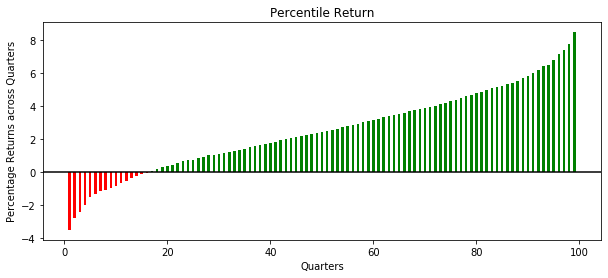

The mean ending value of the simulations : 1.0341975475578842
The median ending value of the simulations : 1.0337784523531397
The standard deviation of ending value of the simulations : 0.026989301420299514
The confidence of 95% the fluctations deviate in +/-:  0.05289903078378705
The 95% percentile :  1.080467592950077
The 90% percentile :  1.0694154527937194
The 75% percentile :  1.0515129361594504
The 50% percentile :  1.0337784523531397
The 35% percentile :  1.0238727823528415
The 20% percentile :  1.0115074414740364
The 10% percentile :  1.000498109954844
The 5% percentile :  0.9890706656141267
The 2% percentile :  0.9801624825970481
The 1% percentile :  0.9739907893064661


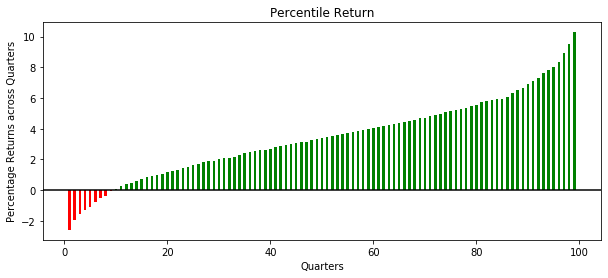

In [485]:
MCS_returns_all_quarters = []
for i in range(8):
    MCS_return = MCS_Portfolio_One_Quarter(preds,labels,i,63,1000)
    MCS_returns_all_quarters.append(MCS_return)

In [486]:
def MCS_all_quarters(MCS_returns_all_quarters,MCS_sims,num_simulations):
    all_sims = []
    for i in range(MCS_sims):
        onesim = []
        for j in range(8):
            value = MCS_returns_all_quarters[j][np.random.randint(0,num_simulations)]
            onesim.append(value)
        all_sims.append(onesim)
    
    all_sims = np.array(all_sims).T
    #all_sims = np.array(all_sims)
    price_list_2 = np.ones(np.shape(all_sims))
    for t in range(1, 8):
        price_list_2[t] = price_list_2[t - 1] * all_sims[t]

    #fig = plt.figure(figsize=(10,5))
    #plt.plot(price_list_2)
    #plt.show()
    return price_list_2

In [487]:
def Full_MCS_Stats(MCS):
    print("The mean ending value of the simulations :",np.mean(MCS[-1]))
    print("The median ending value of the simulations :",np.median(MCS[-1]))
    print("The standard deviation of ending value of the simulations :",np.std(MCS[-1]))
    #print("The variance of the ending value of simulations :",np.var(price_list[-1]))
    print("The confidence of 95% the fluctations deviate in +/-: ", 1.96*np.std(MCS[-1]))
    print("The 95% percentile : ", np.percentile(MCS[-1], 95))
    print("The 90% percentile : ", np.percentile(MCS[-1], 90))
    print("The 75% percentile : ", np.percentile(MCS[-1], 75))
    print("The 50% percentile : ", np.percentile(MCS[-1], 50))
    print("The 35% percentile : ", np.percentile(MCS[-1], 35))
    print("The 20% percentile : ", np.percentile(MCS[-1], 20))
    print("The 10% percentile : ", np.percentile(MCS[-1], 10))
    print("The 5% percentile : ", np.percentile(MCS[-1], 5))
    print("The 2% percentile : ", np.percentile(MCS[-1], 2))
    print("The 1% percentile : ", np.percentile(MCS[-1], 1))

In [488]:
all_sims= MCS_all_quarters(MCS_returns_all_quarters,100,500)

In [489]:
Full_MCS_Stats(all_sims)

The mean ending value of the simulations : 1.2730801965665535
The median ending value of the simulations : 1.2655023284368405
The standard deviation of ending value of the simulations : 0.07749121237833585
The confidence of 95% the fluctations deviate in +/-:  0.15188277626153826
The 95% percentile :  1.390727080598623
The 90% percentile :  1.3674704270148066
The 75% percentile :  1.3248898241272602
The 50% percentile :  1.2655023284368405
The 35% percentile :  1.2361761383046965
The 20% percentile :  1.2103831446150903
The 10% percentile :  1.1841145340859058
The 5% percentile :  1.1539604485120223
The 2% percentile :  1.12302620549543
The 1% percentile :  1.1208229431595513


In [490]:
def full_MCS(num_simulations):
    for sims in [10,100,1000,10000,100000]:
        print("------------------------------------------")
        print("       Results for "+str(sims)+" simulations    ")
        all_sims= MCS_all_quarters(MCS_returns_all_quarters,sims,num_simulations)
        Full_MCS_Stats(all_sims)

In [472]:
full_MCS(num_simulations=1000)

------------------------------------------
       Results for 10 simulations    
The mean ending value of the simulations : 1.4163300478260445
The median ending value of the simulations : 1.403219450083801
The standard deviation of ending value of the simulations : 0.12867304219458656
The confidence of 95% the fluctations deviate in +/-:  0.25219916270138965
The 95% percentile :  1.6382093731982446
The 90% percentile :  1.5525867677574936
The 75% percentile :  1.4403401163684726
The 50% percentile :  1.403219450083801
The 35% percentile :  1.3857422058168247
The 20% percentile :  1.3089432566128452
The 10% percentile :  1.2835196286277737
The 5% percentile :  1.2666636827963016
The 2% percentile :  1.2565501152974181
The 1% percentile :  1.2531789261311237
------------------------------------------
       Results for 100 simulations    
The mean ending value of the simulations : 1.3682207072704133
The median ending value of the simulations : 1.3746468821564453
The standard deviation of

In [491]:
full_MCS(num_simulations=1000)

------------------------------------------
       Results for 10 simulations    
The mean ending value of the simulations : 1.286090555851661
The median ending value of the simulations : 1.25992840422201
The standard deviation of ending value of the simulations : 0.08175144897167894
The confidence of 95% the fluctations deviate in +/-:  0.1602328399844907
The 95% percentile :  1.4164205671759837
The 90% percentile :  1.3850691293569395
The 75% percentile :  1.3401981394472018
The 50% percentile :  1.25992840422201
The 35% percentile :  1.2486531632134608
The 20% percentile :  1.2152583449917087
The 10% percentile :  1.197079054971278
The 5% percentile :  1.186481923147531
The 2% percentile :  1.1801236440532825
The 1% percentile :  1.178004217688533
------------------------------------------
       Results for 100 simulations    
The mean ending value of the simulations : 1.2620824254355396
The median ending value of the simulations : 1.2555465286998202
The standard deviation of ending